# IMPORTING LIBRARIES

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

## LOADING DATA

In [69]:
file = r"D:\\Data_scs\\churn project\\Data\\churn_prediction.xlsx"
sheet = 'churned'

data = pd.read_excel(file, sheet_name= sheet)


## DATA INFO


In [70]:
data.head(5)

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,11098-MAD,Female,30,Yes,Madhya Pradesh,0,31,Deal 1,Yes,No,...,Bank Withdrawal,95.099998,6683.399902,0.00,0,631.719971,7315.120117,Stayed,Others,Others
1,11114-PUN,Male,51,No,Punjab,5,9,Deal 5,Yes,No,...,Bank Withdrawal,49.150002,169.050003,0.00,10,122.370003,301.420013,Churned,Competitor,Competitor had better devices
2,11167-WES,Female,43,Yes,West Bengal,3,28,Deal 1,Yes,Yes,...,Bank Withdrawal,116.050003,8297.500000,42.57,110,1872.979980,10237.910156,Stayed,Others,Others
3,11179-MAH,Male,35,No,Maharashtra,10,12,NaN,Yes,No,...,Credit Card,84.400002,5969.299805,0.00,0,219.389999,6188.689941,Stayed,Others,Others
4,11180-TAM,Male,75,Yes,Tamil Nadu,12,27,Deal 2,Yes,No,...,Credit Card,72.599998,4084.350098,0.00,140,332.079987,4556.430176,Stayed,Others,Others


In [73]:
data.shape

(6007, 32)

In [75]:
data.columns

Index(['Customer_ID', 'Gender', 'Age', 'Married', 'State',
       'Number_of_Referrals', 'Tenure_in_Months', 'Value_Deal',
       'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Internet_Type',
       'Online_Security', 'Online_Backup', 'Device_Protection_Plan',
       'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
       'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
       'Payment_Method', 'Monthly_Charge', 'Total_Charges', 'Total_Refunds',
       'Total_Extra_Data_Charges', 'Total_Long_Distance_Charges',
       'Total_Revenue', 'Customer_Status', 'Churn_Category', 'Churn_Reason'],
      dtype='object')

In [77]:
data.dtypes

Customer_ID                     object
Gender                          object
Age                              int64
Married                         object
State                           object
Number_of_Referrals              int64
Tenure_in_Months                 int64
Value_Deal                      object
Phone_Service                   object
Multiple_Lines                  object
Internet_Service                object
Internet_Type                   object
Online_Security                 object
Online_Backup                   object
Device_Protection_Plan          object
Premium_Support                 object
Streaming_TV                    object
Streaming_Movies                object
Streaming_Music                 object
Unlimited_Data                  object
Contract                        object
Paperless_Billing               object
Payment_Method                  object
Monthly_Charge                 float64
Total_Charges                  float64
Total_Refunds            

In [79]:
data.nunique()

Customer_ID                    6007
Gender                            2
Age                              67
Married                           2
State                            22
Number_of_Referrals              16
Tenure_in_Months                 36
Value_Deal                        5
Phone_Service                     2
Multiple_Lines                    2
Internet_Service                  2
Internet_Type                     3
Online_Security                   2
Online_Backup                     2
Device_Protection_Plan            2
Premium_Support                   2
Streaming_TV                      2
Streaming_Movies                  2
Streaming_Music                   2
Unlimited_Data                    2
Contract                          3
Paperless_Billing                 2
Payment_Method                    3
Monthly_Charge                 1543
Total_Charges                  5756
Total_Refunds                   442
Total_Extra_Data_Charges         16
Total_Long_Distance_Charges 

## DATA CLEANING AND PRE-PROCESSING

In [81]:
data = data.drop(['Gender', 'Customer_ID', 'Churn_Category', 'Churn_Reason'], axis=1) # these columns are directly related to the target variable

In [83]:
print(data.isnull().sum())


Age                               0
Married                           0
State                             0
Number_of_Referrals               0
Tenure_in_Months                  0
Value_Deal                     3297
Phone_Service                     0
Multiple_Lines                    0
Internet_Service                  0
Internet_Type                  1223
Online_Security                   0
Online_Backup                     0
Device_Protection_Plan            0
Premium_Support                   0
Streaming_TV                      0
Streaming_Movies                  0
Streaming_Music                   0
Unlimited_Data                    0
Contract                          0
Paperless_Billing                 0
Payment_Method                    0
Monthly_Charge                    0
Total_Charges                     0
Total_Refunds                     0
Total_Extra_Data_Charges          0
Total_Long_Distance_Charges       0
Total_Revenue                     0
Customer_Status             

In [85]:
data['Value_Deal'] = data['Value_Deal'].fillna(data['Value_Deal'].mode()[0])
data['Internet_Type'] = data['Internet_Type'].fillna(data['Internet_Type'].mode()[0])


In [87]:
print(data.duplicated().sum())


0


In [89]:
# List of binary categorical columns to Label Encode
label_encode_columns = [
    'Married', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 
    'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 
    'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing'
]

# List of categorical columns with multiple categories to One-Hot Encode
one_hot_encode_columns = ['State', 'Internet_Service', 'Internet_Type', 'Payment_Method']

# Apply Label Encoding
label_encoders = {}  # Dictionary to store LabelEncoders for possible inverse transformations
for column in label_encode_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Save encoder for potential future use

# Apply One-Hot Encoding
data = pd.get_dummies(data, columns=one_hot_encode_columns, drop_first=True)

# Manually encode the target variable 'Customer_Status'
data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})


### SPLITTING DATA INTO TRAIN TEST SPLIT

In [91]:
X = data.drop('Customer_Status', axis=1)

y = data['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## MODEL TRAINING

In [93]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:

y_pred = rf_model.predict(X_test)


In [101]:

print("Confusion Matrix:")

print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")

print(classification_report(y_test, y_pred))

 


Confusion Matrix:
[[780  67]
 [124 231]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.78      0.65      0.71       355

    accuracy                           0.84      1202
   macro avg       0.82      0.79      0.80      1202
weighted avg       0.84      0.84      0.84      1202



* There is an imbalance between 0s and 1s. If data can be more balanced, accuracy can be increased.

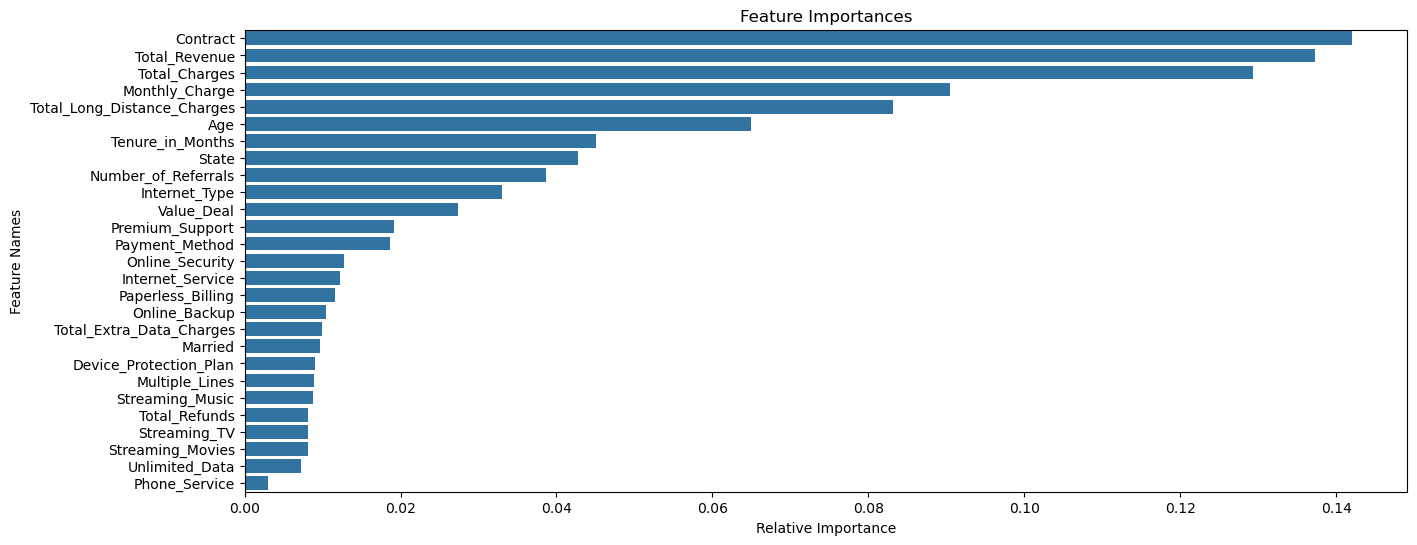

In [10]:
# Feature Selection using Feature Importance

importances = rf_model.feature_importances_

indices = np.argsort(importances)[::-1]

 

# Plot the feature importances

plt.figure(figsize=(15, 6))

sns.barplot(x=importances[indices], y=X.columns[indices])

plt.title('Feature Importances')

plt.xlabel('Relative Importance')

plt.ylabel('Feature Names')

plt.show()

* we can remove features that have importance less than 0.01

In [120]:
# Define the path to the Joiner Data Excel file
file_path = r"D:\\Data_scs\\churn project\\Data\\churn_prediction.xlsx"

# Define the sheet name to read data from
sheet_name = 'joined'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head(5))

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

 # Retain the Customer_ID column
customer_ids = new_data['Customer_ID']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['Gender', 'Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

 
columns_to_encode = [

    'Married', 'Value_Deal', 'Phone_Service', 'Multiple_Lines', 
    'Online_Security', 'Online_Backup', 'Device_Protection_Plan', 
    'Premium_Support', 'Streaming_TV', 'Streaming_Movies', 
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing'
]

one_hot_encode_columns = ['State', 'Internet_Service', 'Internet_Type', 'Payment_Method']

label_encoders = {}

for column in columns_to_encode:

    label_encoders[column] = LabelEncoder()

    new_data[column] = label_encoders[column].fit_transform(new_data[column])

new_data = pd.get_dummies(new_data, columns=one_hot_encode_columns, drop_first=True)
# Encode categorical variables using the saved label encoders

#for column in new_data.select_dtypes(include=['object']).columns:

    #new_data[column] = label_encoders[column].transform(new_data[column])

 
# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv(r"D:\Data_scs\churn project\Data\Predictions2.csv", index=False)

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Multiple_Lines  ...  \
0                 7     Deal 5            No             No  ...   
1                20        NaN           Yes             No  ...   
2                35        NaN           Yes             No  ...   
3                 1        NaN           Yes             No  ...   
4                10        NaN           Yes             No  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.4